/var/folders/0p/bfk7s5314wzfkww172k0x4280000gn/T/ipykernel_75599/3161331163.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


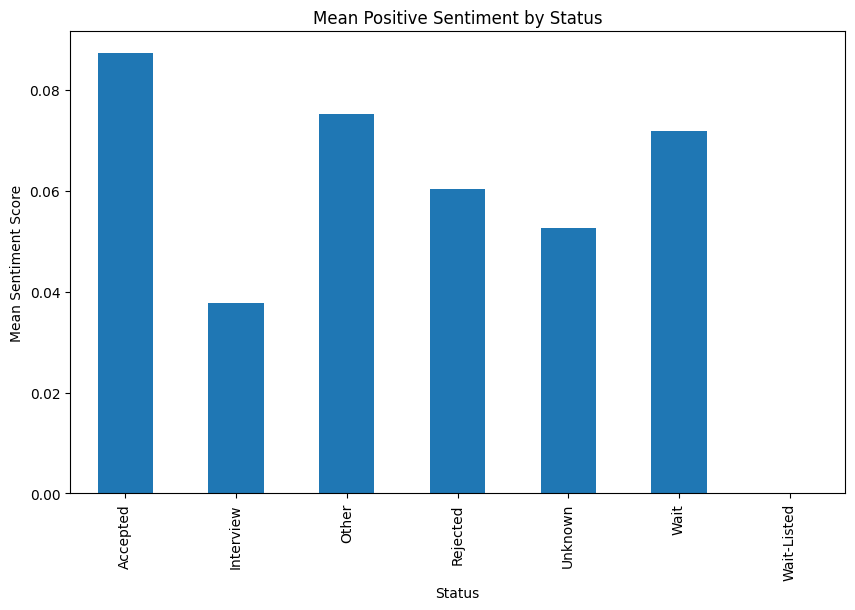

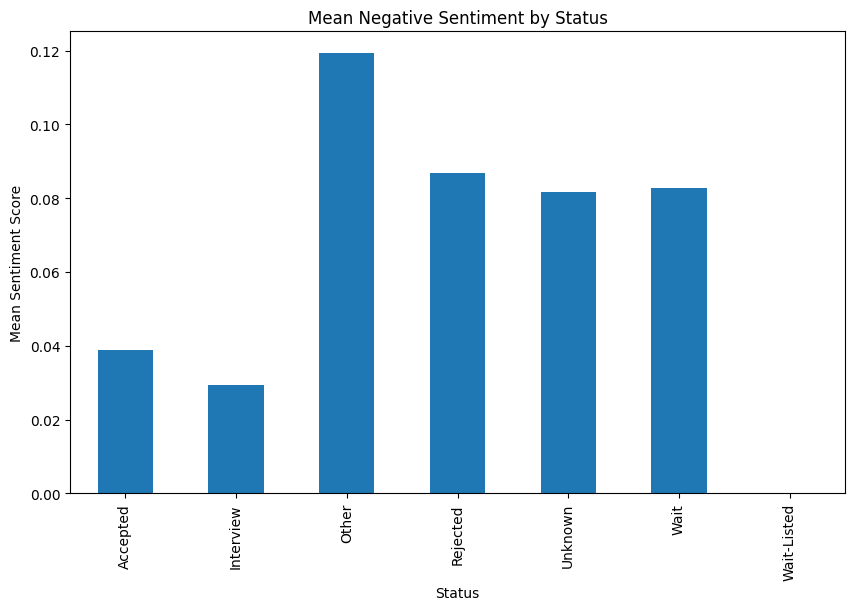

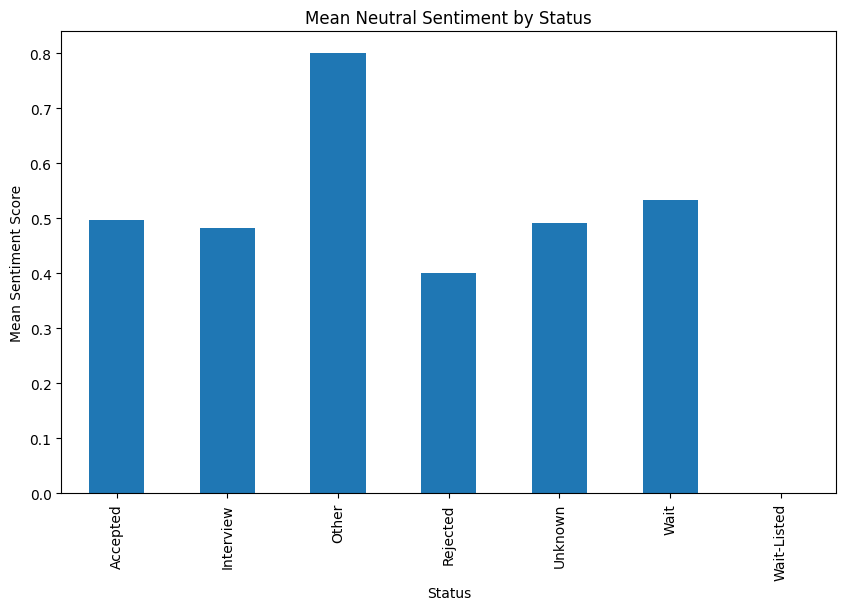

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming the CSV is already loaded into DataFrame df
# Sample CSV loading - replace this with your actual CSV file path
csv_path = 'Sentiment.csv'
df = pd.read_csv(csv_path)

# Function to parse status from the Status_Date
def parse_status(status_date):
    try:
        return status_date.split(' ')[0]
    except Exception as e:
        #print(f"Error parsing status: {e}")
        return "Unknown"  # or any default value you prefer

# Function to parse date from the Status_Date
def parse_status_date(status_date):
    try:
        # Assuming the date is always after the first two words "Rejected on"
        date_str = ' '.join(status_date.split(' ')[2:])
        return pd.to_datetime(date_str, format='%d %b')  # Adjust the format as per your date format
    except Exception as e:
        #print(f"Error parsing status date: {e}")
        return pd.NaT  # Not a Time for missing or faulty dates

# Apply parsing functions
df['Status'] = df['Status_Date'].apply(parse_status)
df['Status_Date'] = df['Status_Date'].apply(parse_status_date)

# Ensure Date_Added is a datetime object, handle errors
def parse_date_added(date_str):
    try:
        return pd.to_datetime(date_str)
    except Exception as e:
        #print(f"Error parsing Date_Added: {e}")
        return pd.NaT

df['Date_Added'] = df['Date_Added'].apply(parse_date_added)

# Visualization code remains the same
for sentiment in ['Positive', 'Negative', 'Neutral']:
    df.groupby('Status')[sentiment].mean().plot(kind='bar', figsize=(10, 6), title=f'Mean {sentiment} Sentiment by Status')
    plt.ylabel('Mean Sentiment Score')
    plt.show()
